# Medical Insurance Prediction System

## Load Dependencies or libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


## Data Gathering

In [2]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Categorical features:-
    1.sex
    2.smoker
    3.region
    
Numerical Feature:-
    1.age
    2.bmi
    3.children

In [7]:
df.corr()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9128\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
categorical_fea=df[['sex','smoker','region']]
categorical_fea
col=categorical_fea.columns
col

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
for i in col:
    print(i)
    print(categorical_fea[i].value_counts(),'\n')

sex
male      676
female    662
Name: sex, dtype: int64 

smoker
no     1064
yes     274
Name: smoker, dtype: int64 

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 



# EDA

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9128\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

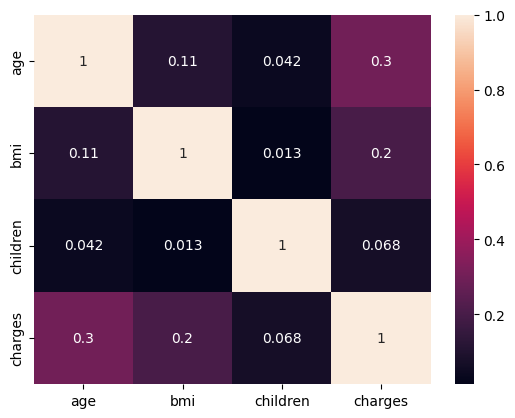

In [11]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
Observation:
    The corelation between independent variable and dependent variable is <=0.3
    

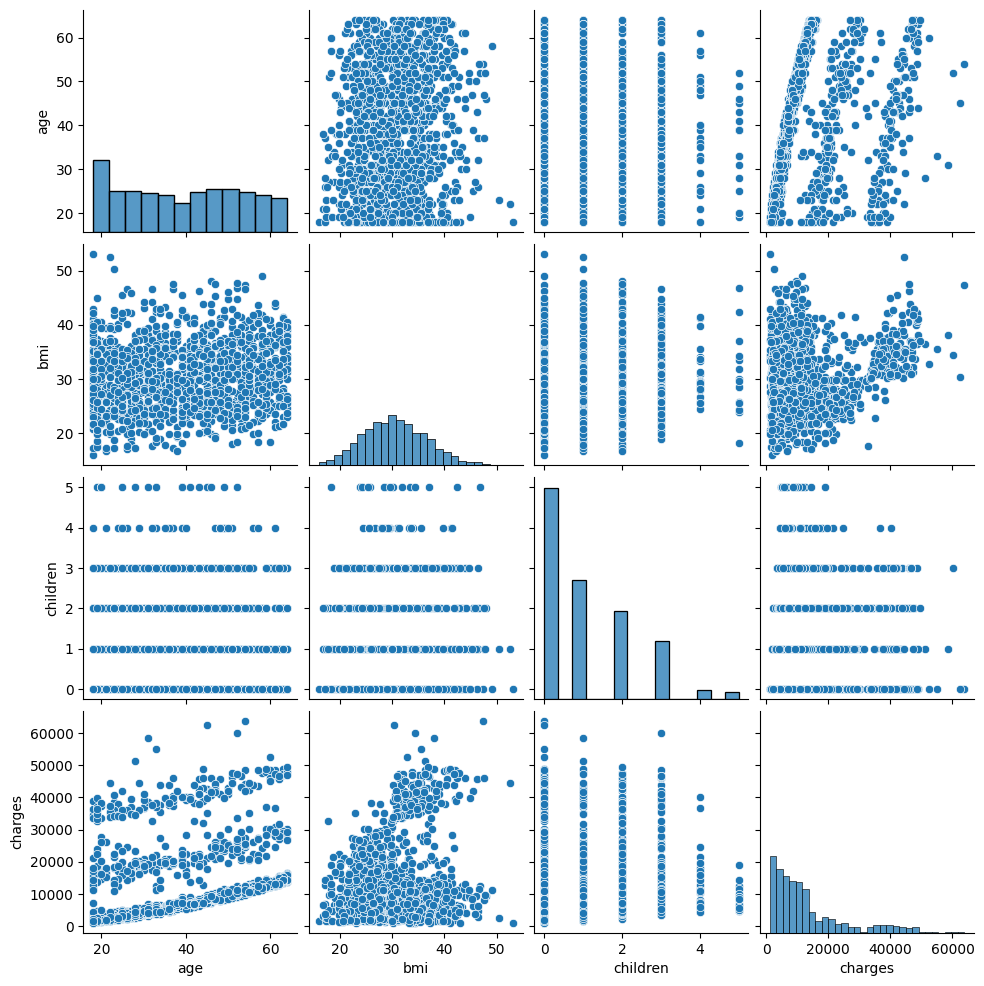

In [12]:
sns.pairplot(data=df)

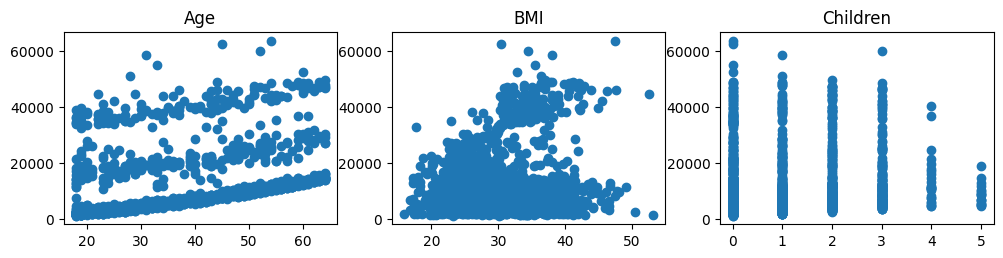

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['age'],df['charges'])
ax1.set_title("Age")
ax2.scatter(df['bmi'],df['charges'])
ax2.set_title("BMI")
ax3.scatter(df['children'],df['charges'])
ax3.set_title("Children")

plt.show()

Text(0.5, 1.0, 'sex Distribution')

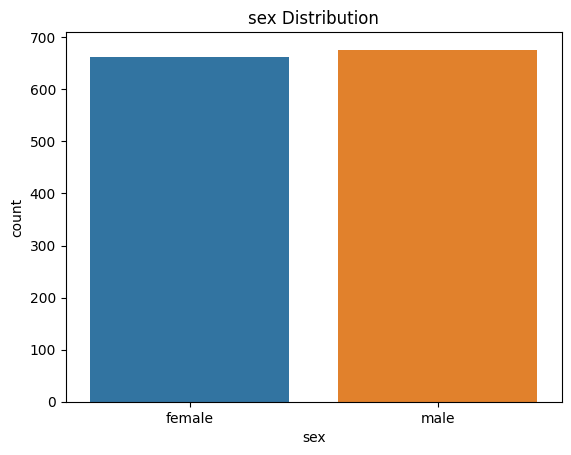

In [14]:
sns.countplot(x='sex',data=df)
plt.title("sex Distribution")

<AxesSubplot: xlabel='children', ylabel='count'>

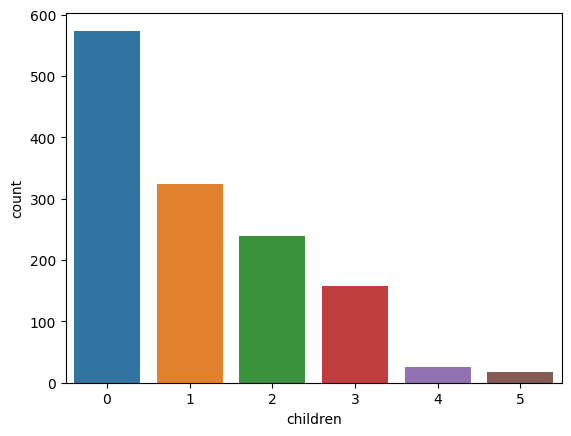

In [15]:
sns.countplot(x='children',data=df)


# Feature Engineering

In [16]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [17]:
df.replace({'sex':{'male': 0,
    'female': 1}},inplace=True)

In [18]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [19]:
df.replace({'smoker':{'no': 0,
    'yes': 1}},inplace=True)

In [20]:
df.replace({'region':{'southeast': 0,
    'southwest': 1,'northwest':2,'northeast':3}},inplace=True)


In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [23]:
x=df.drop("charges",axis=1)
y=df["charges"]
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [24]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [26]:
x_train.shape

(1070, 6)

In [27]:
x_test.shape

(268, 6)

In [28]:
y_train.shape

(1070,)

In [29]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [35]:
#prediction in train data
predict_train=regressor.predict(x_train)
predict_train

array([10495.41723504,  8620.29416361,  3975.67878849, ...,
       37646.23628395, 29617.63490188, 11398.01645604])

In [32]:
r2_train = metrics.r2_score(y_train,predict_train)
print('R squared vale : ', r2_train)

R squared vale :  0.7477189944705613


In [37]:
#prediction in test data

predict_test=regressor.predict(x_test)
predict_test[:5]

array([ 4389.34963548, 12878.93042483, 12735.11298474, 13194.98672343,
         677.22925899])

In [34]:
r2_train = metrics.r2_score(y_test, predict_test)
print('R squared vale : ', r2_train)

R squared vale :  0.7621302054070109


# Assumptions:

## 1.Normality of residual

In [44]:
residual=y_train-predict_train
residual

216      -139.776235
731      1445.118836
866     -2834.233688
202      1543.538326
820     -3085.714286
            ...     
715      -289.616303
905     -1046.242474
1096     6994.961116
235    -10173.369102
1061      156.207144
Name: charges, Length: 1070, dtype: float64

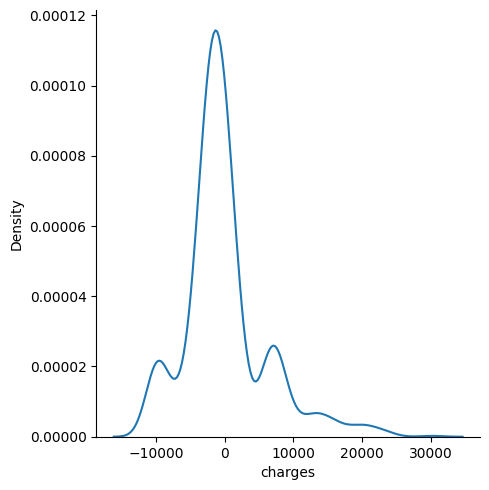

In [45]:
sns.displot(residual,kind='kde')

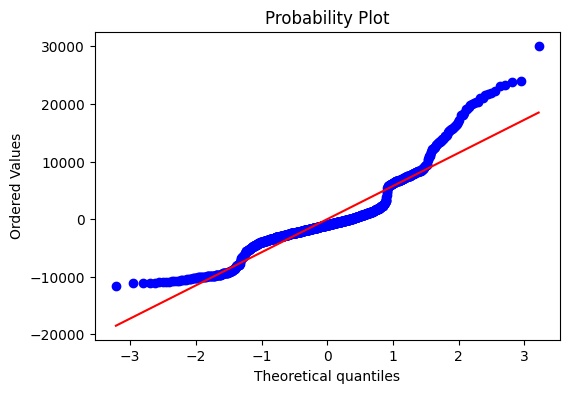

In [46]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

## 2.Homoscedastisity

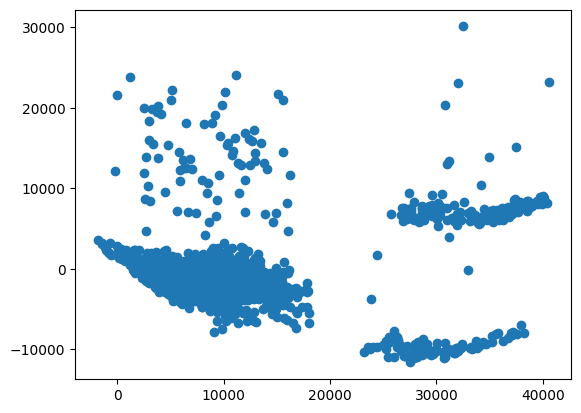

In [47]:
plt.scatter(predict_train,residual)

## 3.Autocorrelation of Residuals

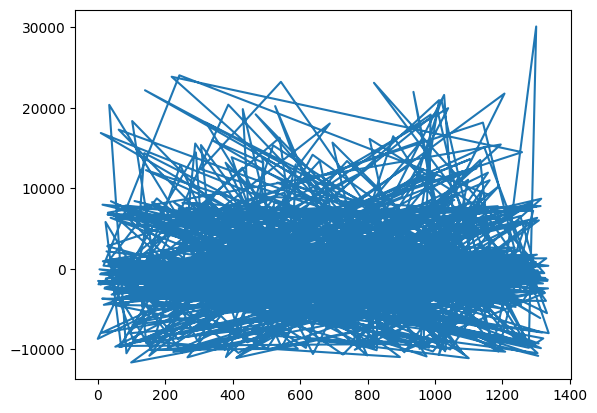

In [49]:
plt.plot(residual)

## 4.Linearity

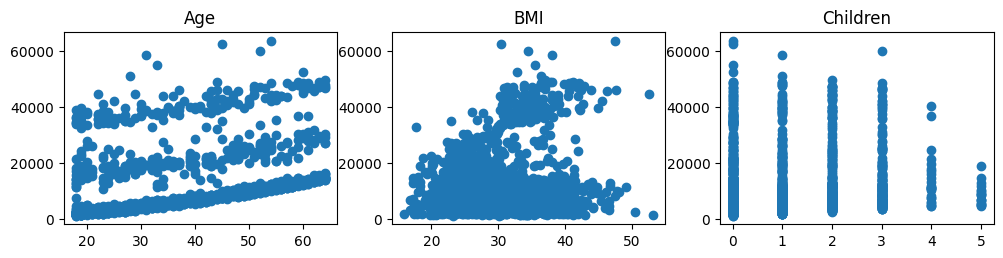

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['age'],df['charges'])
ax1.set_title("Age")
ax2.scatter(df['bmi'],df['charges'])
ax2.set_title("BMI")
ax3.scatter(df['children'],df['charges'])
ax3.set_title("Children")

plt.show()

## 5.Multicollinearity

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train, i))

In [58]:
pd.DataFrame({'vif': vif}, index=df.columns[0:6]).T

,age,sex,bmi,children,smoker,region
vif,7.949264,1.903868,8.844998,1.787205,1.250332,2.400299


In [61]:

array=np.array([61,1,29.070,0,1,2])
array=array.reshape(1,-1)
predictions=regressor.predict(array)
print("The Insurance Cost is ",predictions[0])

The Insurance Cost is  37145.36076165787


C:\Users\ADMIN\anaconda3\envs\machinelearning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
